<a href="https://colab.research.google.com/github/andrejtodorovski/Vnp/blob/main/Lab4_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'>
<ul>We are using the same dataset as the previous laboratory exercise, now you need to build Neural networks</ul>

<li>Build three different networks with using:</li>
different layers, activation functions, neurans per layers, number of layers
<li>train your network and set the optimal number of epochs and batch size</li>
<li>Evaluate the three networks on the same test dataset</li>
<li>Compare the results</li>
</ul>

The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







In [250]:
!gdown 1RBoVaZg97OJ5A2I4TQ3PDmwRJL8q5ySG


Downloading...
From: https://drive.google.com/uc?id=1RBoVaZg97OJ5A2I4TQ3PDmwRJL8q5ySG
To: /content/winequality-red.csv
100% 101k/101k [00:00<00:00, 71.2MB/s]


In [251]:
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np

In [252]:
data1 = pd.read_csv('winequality-red.csv')

In [195]:
data1.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [196]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [197]:
data1.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Trying with multiclass target value

In [198]:
X_1 = data1.drop('quality', axis = 1)
Y_1 = data1['quality'] 

In [199]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y_1, test_size = 0.2, random_state = 0)

In [200]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_1 = sc.fit_transform(X_train_1)
X_test_1 = sc.transform(X_test_1)

First model

In [201]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

first_model = Sequential()
first_model.add(Dense(16, input_dim=11, activation='relu'))
first_model.add(Dense(8, activation='relu'))
first_model.add(Dense(8, activation='relu'))
first_model.add(Dense(4, activation='relu'))
first_model.add(Dense(9, activation='softmax'))
first_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
first_history = first_model.fit(X_train_1, to_categorical(Y_train_1), epochs=30, batch_size=16, validation_split=0.2)

Epoch 1/30
64/64 [==============================] - 1s 6ms/step - loss: 1.9980 - accuracy: 0.2630 - val_loss: 1.7656 - val_accuracy: 0.3906
Epoch 2/30
64/64 [==============================] - 0s 3ms/step - loss: 1.4633 - accuracy: 0.3754 - val_loss: 1.4026 - val_accuracy: 0.3711
Epoch 3/30
64/64 [==============================] - 0s 2ms/step - loss: 1.2826 - accuracy: 0.4115 - val_loss: 1.3386 - val_accuracy: 0.4023
Epoch 4/30
64/64 [==============================] - 0s 3ms/step - loss: 1.2380 - accuracy: 0.4330 - val_loss: 1.2975 - val_accuracy: 0.4023
Epoch 5/30
64/64 [==============================] - 0s 3ms/step - loss: 1.2097 - accuracy: 0.4330 - val_loss: 1.2697 - val_accuracy: 0.4023
Epoch 6/30
64/64 [==============================] - 0s 3ms/step - loss: 1.1880 - accuracy: 0.4330 - val_loss: 1.2499 - val_accuracy: 0.4023
Epoch 7/30
64/64 [==============================] - 0s 3ms/step - loss: 1.1716 - accuracy: 0.4330 - val_loss: 1.2256 - val_accuracy: 0.4023
Epoch 8/30
64/64 [==

In [202]:
first_y_pred = first_model.predict(X_test_1) 

10/10 [==============================] - 0s 2ms/step


In [203]:
true_y_pred = []
for k in range(len(first_y_pred)):
  mk = max(first_y_pred[k])
  for n in range(len(first_y_pred[k])):
    if first_y_pred[k][n]==mk:
      true_y_pred.append(n)

In [204]:
from sklearn.metrics import r2_score
r2_1 = r2_score(Y_test_1,true_y_pred)
print("r_square score: ", r2_score(Y_test_1,true_y_pred))

r_square score:  0.17024906175366772


In [205]:
acc1 = accuracy_score(Y_test_1, true_y_pred)
acc1

0.61875

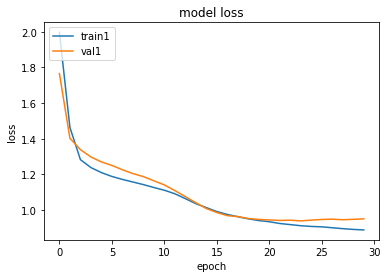

In [206]:
import matplotlib.pyplot as plt
plt.plot(first_history.history['loss'])
plt.plot(first_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train1','val1'], loc='upper left')
plt.show()

Second model

In [207]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

second_model = Sequential()
second_model.add(Dense(256, input_dim=11, activation='relu'))
second_model.add(Dropout(0.1, input_shape=(256,)))
second_model.add(Dense(128, activation='relu'))
second_model.add(Dropout(0.1, input_shape=(128,)))
second_model.add(Dense(64, activation='relu'))
second_model.add(Dropout(0.1, input_shape=(64,)))
second_model.add(Dense(32, activation='relu'))
second_model.add(Dropout(0.1, input_shape=(32,)))
second_model.add(Dense(16, activation='relu'))
second_model.add(Dropout(0.1, input_shape=(16,)))
second_model.add(Dense(8, activation='relu'))
second_model.add(Dropout(0.1, input_shape=(8,)))
second_model.add(Dense(9, activation='softmax'))
second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
second_history = second_model.fit(X_train_1, to_categorical(Y_train_1), epochs=30, batch_size=16, validation_split=0.2)

Epoch 1/30
64/64 [==============================] - 1s 7ms/step - loss: 1.9867 - accuracy: 0.3666 - val_loss: 1.7471 - val_accuracy: 0.4297
Epoch 2/30
64/64 [==============================] - 0s 4ms/step - loss: 1.5091 - accuracy: 0.4692 - val_loss: 1.1340 - val_accuracy: 0.5508
Epoch 3/30
64/64 [==============================] - 0s 4ms/step - loss: 1.2728 - accuracy: 0.5152 - val_loss: 1.0782 - val_accuracy: 0.5938
Epoch 4/30
64/64 [==============================] - 0s 5ms/step - loss: 1.2097 - accuracy: 0.5347 - val_loss: 1.0666 - val_accuracy: 0.5898
Epoch 5/30
64/64 [==============================] - 0s 4ms/step - loss: 1.1558 - accuracy: 0.5386 - val_loss: 1.0343 - val_accuracy: 0.5977
Epoch 6/30
64/64 [==============================] - 0s 4ms/step - loss: 1.1266 - accuracy: 0.5621 - val_loss: 0.9979 - val_accuracy: 0.5742
Epoch 7/30
64/64 [==============================] - 0s 5ms/step - loss: 1.0814 - accuracy: 0.5640 - val_loss: 0.9646 - val_accuracy: 0.6172
Epoch 8/30
64/64 [==

In [208]:
second_y_pred = second_model.predict(X_test_1) 

10/10 [==============================] - 0s 2ms/step


In [209]:
true_y_pred_2 = []
for k in range(len(second_y_pred)):
  mk = max(second_y_pred[k])
  for n in range(len(second_y_pred[k])):
    if second_y_pred[k][n]==mk:
      true_y_pred_2.append(n)

In [210]:
from sklearn.metrics import r2_score
r2_2 = r2_score(Y_test_1,true_y_pred_2)
print("r_square score: ", r2_score(Y_test_1,true_y_pred_2))

r_square score:  -0.03718867280791538


In [211]:
acc2 = accuracy_score(Y_test_1, true_y_pred_2)
acc2

0.603125

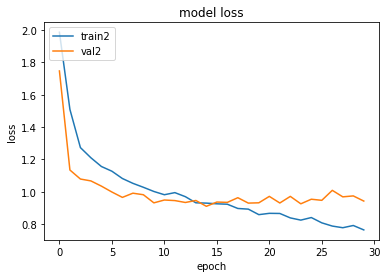

In [212]:
import matplotlib.pyplot as plt
plt.plot(second_history.history['loss'])
plt.plot(second_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train2','val2'], loc='upper left')
plt.show()

Third model

In [213]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

third_model = Sequential()
third_model.add(Dense(256, kernel_initializer='uniform', activation='relu', input_dim=11))
third_model.add(Dropout(0.1, input_shape=(256,)))
third_model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
third_model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
third_model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
third_model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
third_model.add(Dense(9,activation='softmax'))
third_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
third_history = third_model.fit(X_train_1, to_categorical(Y_train_1), epochs=30, batch_size=16, validation_split=0.2)

Epoch 1/30
64/64 [==============================] - 1s 7ms/step - loss: 1.5294 - accuracy: 0.4066 - val_loss: 1.1981 - val_accuracy: 0.4023
Epoch 2/30
64/64 [==============================] - 0s 4ms/step - loss: 1.1640 - accuracy: 0.4350 - val_loss: 1.1379 - val_accuracy: 0.4102
Epoch 3/30
64/64 [==============================] - 0s 4ms/step - loss: 1.1341 - accuracy: 0.4790 - val_loss: 1.1065 - val_accuracy: 0.5117
Epoch 4/30
64/64 [==============================] - 0s 4ms/step - loss: 1.1008 - accuracy: 0.5200 - val_loss: 1.0483 - val_accuracy: 0.5586
Epoch 5/30
64/64 [==============================] - 0s 4ms/step - loss: 1.0191 - accuracy: 0.5523 - val_loss: 0.9581 - val_accuracy: 0.6016
Epoch 6/30
64/64 [==============================] - 0s 5ms/step - loss: 0.9783 - accuracy: 0.5709 - val_loss: 0.9737 - val_accuracy: 0.5469
Epoch 7/30
64/64 [==============================] - 0s 4ms/step - loss: 0.9679 - accuracy: 0.5806 - val_loss: 0.9154 - val_accuracy: 0.6055
Epoch 8/30
64/64 [==

In [214]:
third_y_pred = third_model.predict(X_test_1) 


10/10 [==============================] - 0s 2ms/step


In [215]:
true_y_pred_3 = []
for k in range(len(third_y_pred)):
  mk = max(third_y_pred[k])
  for n in range(len(third_y_pred[k])):
    if third_y_pred[k][n]==mk:
      true_y_pred_3.append(n)

In [216]:
from sklearn.metrics import r2_score
r2_3 = r2_score(Y_test_1,true_y_pred_3)
print("r_square score: ", r2_score(Y_test_1,true_y_pred_3))

r_square score:  0.1429546229955646


In [217]:
acc3 = accuracy_score(Y_test_1, true_y_pred_3)
acc3

0.6625

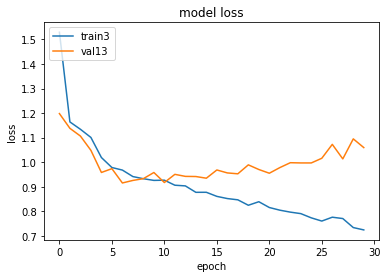

In [218]:
import matplotlib.pyplot as plt
plt.plot(third_history.history['loss'])
plt.plot(third_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train3','val13'], loc='upper left')
plt.show()

Text(0, 0.5, 'Accuracy')

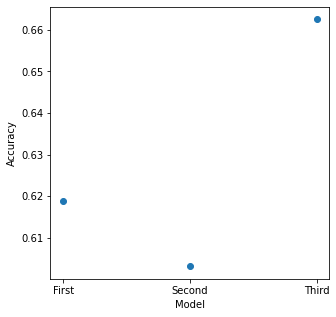

In [219]:
xindex = ['First','Second', 'Third']
yindex = [acc1,acc2,acc3]

plot = plt.figure(figsize=(5,5))
plt.scatter(xindex, yindex)
plt.xlabel('Model')
plt.ylabel('Accuracy')

Trying with binary target value

In [220]:
data2 = pd.read_csv('/content/sample_data/winequality-red.csv')

In [221]:
quality = []
for i in data2['quality']:
    if i >= 1 and i <= 5:
        quality.append('bad')
    elif i >= 6 and i <= 9:
        quality.append('good')
data2.drop(['quality'],axis=1)
data2['quality'] = quality

In [222]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [223]:
data2.quality.value_counts()

good    855
bad     744
Name: quality, dtype: int64

Encoding the target value and scaling everything

In [224]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [225]:
encoder = LabelEncoder()
data2['quality'] = encoder.fit_transform(data2['quality'])


In [226]:
data2.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

In [227]:
X_2 = data2.drop('quality', axis = 1)
Y_2 = data2['quality']

In [228]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size = 0.2, random_state = 0)

In [229]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_2 = sc.fit_transform(X_train_2)
X_test_2 = sc.transform(X_test_2)

3 networks with different layers, activation functions, neurans per layers, number of layers

**First Network**

In [230]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model1 = Sequential()
model1.add(Dense(16, input_dim=11, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [231]:
model1.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 16)                192       
                                                                 
 dense_124 (Dense)           (None, 8)                 136       
                                                                 
 dense_125 (Dense)           (None, 8)                 72        
                                                                 
 dense_126 (Dense)           (None, 4)                 36        
                                                                 
 dense_127 (Dense)           (None, 1)                 5         
                                                                 
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


In [232]:
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy']) 


In [233]:
history1 = model1.fit(X_train_2, Y_train_2, epochs=20, batch_size=16, verbose=1, validation_split=0.2)


Epoch 1/20
64/64 [==============================] - 1s 6ms/step - loss: 0.6703 - accuracy: 0.6129 - val_loss: 0.6832 - val_accuracy: 0.6211
Epoch 2/20
64/64 [==============================] - 0s 3ms/step - loss: 0.6254 - accuracy: 0.6891 - val_loss: 0.6410 - val_accuracy: 0.6758
Epoch 3/20
64/64 [==============================] - 0s 3ms/step - loss: 0.5807 - accuracy: 0.7136 - val_loss: 0.6061 - val_accuracy: 0.6992
Epoch 4/20
64/64 [==============================] - 0s 3ms/step - loss: 0.5524 - accuracy: 0.7341 - val_loss: 0.5932 - val_accuracy: 0.7070
Epoch 5/20
64/64 [==============================] - 0s 3ms/step - loss: 0.5333 - accuracy: 0.7370 - val_loss: 0.5785 - val_accuracy: 0.7148
Epoch 6/20
64/64 [==============================] - 0s 3ms/step - loss: 0.5226 - accuracy: 0.7429 - val_loss: 0.5670 - val_accuracy: 0.7188
Epoch 7/20
64/64 [==============================] - 0s 3ms/step - loss: 0.5126 - accuracy: 0.7507 - val_loss: 0.5655 - val_accuracy: 0.7188
Epoch 8/20
64/64 [==

In [234]:
y_pred_1 = model1.predict(X_test_2) 
y_pred_1 = y_pred_1.round()

10/10 [==============================] - 0s 2ms/step


accuracy of the model:  0.771875


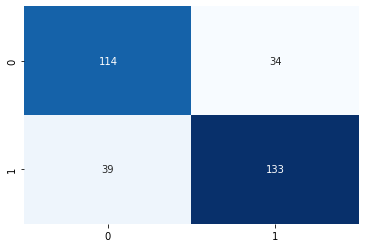

In [235]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm1 = confusion_matrix(Y_test_2, y_pred_1.round())
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d", cbar=False)

ac1 = accuracy_score(Y_test_2, y_pred_1.round())
print('accuracy of the model: ', ac1)

Second network

In [236]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model2 = Sequential()
model2.add(Dense(256, input_dim=11, activation='relu'))
model2.add(Dropout(0.1, input_shape=(256,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.1, input_shape=(128,)))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.1, input_shape=(64,)))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.1, input_shape=(32,)))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.1, input_shape=(16,)))
model2.add(Dense(8, activation='relu'))
model2.add(Dropout(0.1, input_shape=(8,)))
model2.add(Dense(1, activation='sigmoid'))

In [237]:
model2.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 256)               3072      
                                                                 
 dropout_40 (Dropout)        (None, 256)               0         
                                                                 
 dense_129 (Dense)           (None, 128)               32896     
                                                                 
 dropout_41 (Dropout)        (None, 128)               0         
                                                                 
 dense_130 (Dense)           (None, 64)                8256      
                                                                 
 dropout_42 (Dropout)        (None, 64)                0         
                                                                 
 dense_131 (Dense)           (None, 32)              

In [238]:
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy']) 


In [239]:
history2 = model2.fit(X_train_2, Y_train_2, epochs=20, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/20
32/32 [==============================] - 1s 10ms/step - loss: 0.6386 - accuracy: 0.6373 - val_loss: 0.5656 - val_accuracy: 0.7266
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.5718 - accuracy: 0.7243 - val_loss: 0.5314 - val_accuracy: 0.7266
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.5452 - accuracy: 0.7331 - val_loss: 0.5144 - val_accuracy: 0.7148
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 0.5236 - accuracy: 0.7507 - val_loss: 0.5034 - val_accuracy: 0.7188
Epoch 5/20
32/32 [==============================] - 0s 5ms/step - loss: 0.5127 - accuracy: 0.7693 - val_loss: 0.5010 - val_accuracy: 0.7305
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.4921 - accuracy: 0.7654 - val_loss: 0.5001 - val_accuracy: 0.7422
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.4880 - accuracy: 0.7771 - val_loss: 0.5059 - val_accuracy: 0.7188
Epoch 8/20
32/32 [=

In [240]:
y_pred_2 = model2.predict(X_test_2) 
y_pred_2 = y_pred_2.round()

10/10 [==============================] - 0s 2ms/step


accuracy of the model:  0.759375


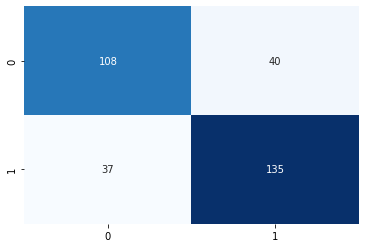

In [241]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm2 = confusion_matrix(Y_test_2, y_pred_2.round())
sns.heatmap(cm2, annot=True, cmap="Blues", fmt="d", cbar=False)

ac2 = accuracy_score(Y_test_2, y_pred_2.round())
print('accuracy of the model: ', ac2)

Third network

In [242]:
model3 = Sequential()
model3.add(Dense(256, kernel_initializer='uniform', activation='relu', input_dim=11))
model3.add(Dropout(0.1, input_shape=(256,)))
model3.add(Dense(64, kernel_initializer='uniform', activation='relu'))
model3.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model3.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model3.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model3.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))


In [243]:
model3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy']) 


In [244]:
history3 = model3.fit(X_train_2, Y_train_2, epochs=20, batch_size=64,  verbose=1, validation_split=0.2)


Epoch 1/20
16/16 [==============================] - 1s 18ms/step - loss: 0.6921 - accuracy: 0.5220 - val_loss: 0.6866 - val_accuracy: 0.5508
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 0.6482 - accuracy: 0.5973 - val_loss: 0.5700 - val_accuracy: 0.7539
Epoch 3/20
16/16 [==============================] - 0s 6ms/step - loss: 0.5649 - accuracy: 0.7361 - val_loss: 0.5336 - val_accuracy: 0.7148
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5233 - accuracy: 0.7546 - val_loss: 0.5127 - val_accuracy: 0.7461
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: 0.5095 - accuracy: 0.7625 - val_loss: 0.5157 - val_accuracy: 0.7227
Epoch 6/20
16/16 [==============================] - 0s 6ms/step - loss: 0.4990 - accuracy: 0.7634 - val_loss: 0.5220 - val_accuracy: 0.7188
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.4936 - accuracy: 0.7683 - val_loss: 0.5135 - val_accuracy: 0.7344
Epoch 8/20
16/16 [=

In [245]:
y_pred_3 = model3.predict(X_test_2) 
y_pred_3 = y_pred_3.round()

10/10 [==============================] - 0s 2ms/step


accuracy of the model:  0.746875


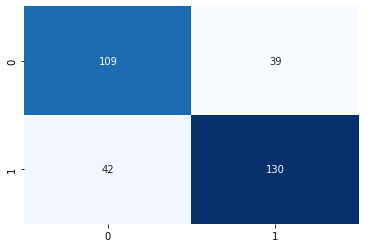

In [246]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm3 = confusion_matrix(Y_test_2, y_pred_3.round())
sns.heatmap(cm3, annot=True, cmap="Blues", fmt="d", cbar=False)

ac3 = accuracy_score(Y_test_2, y_pred_3.round())
print('accuracy of the model: ', ac3)

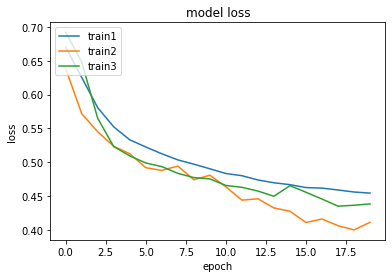

In [247]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train1','train2','train3','val1','val2','val3'], loc='upper left')
plt.show()

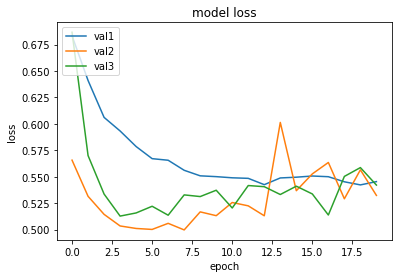

In [248]:
import matplotlib.pyplot as plt
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val1','val2','val3'], loc='upper left')
plt.show()

Text(0, 0.5, 'Accuracy')

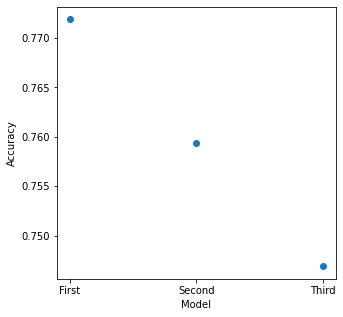

In [249]:
xindex = ['First','Second', 'Third']
yindex = [ac1,ac2,ac3]

plot = plt.figure(figsize=(5,5))
plt.scatter(xindex, yindex)
plt.xlabel('Model')
plt.ylabel('Accuracy')
     